In [1]:
# Import Libraries
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
"""This function takes as input a path and a productID associated to a table obtained from StatsCan
    In this exercise we will explore the dataset https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310011101#tables 
""" 
def read_data_compute_df(path,productID):
    # Read zipped file
    zf = zipfile.ZipFile(path + str(productID) + '-eng.zip') 
    # Parse csv content without unzipping !!!
    df = pd.read_csv(zf.open(str(productID)+'.csv'),low_memory=False)
    
    return df

In [3]:
# Read data
path = "./Data/"
prodID = "13100111"
cancer_data = read_data_compute_df(path,prodID)

In [4]:
# Clean up data
clean_cancer_data= cancer_data.drop(columns=["DGUID","UOM_ID","UOM","SCALAR_ID","VECTOR","COORDINATE","STATUS","TERMINATED",\
              "DECIMALS","SYMBOL"])

In [5]:
# Get data subsets
dates = clean_cancer_data.iloc[:,0].unique()
geog = clean_cancer_data.iloc[:,1].unique()
age_group = clean_cancer_data.iloc[:,2].unique()
sex = clean_cancer_data.iloc[:,3].unique()
cancer_type = clean_cancer_data.iloc[:,4].unique()
characteristics = clean_cancer_data.iloc[:,5].unique()

In [40]:
# Specify values
year = dates[15]
esex = sex[0]
eage = age_group[7]
geoLoc = geog[0]
# I will use Lung and bronchus in this example. All other cancer types are stored in the cancer_type variable
cancer = 'Lung and bronchus [C34.0-C34.9]'

In [41]:
# Extract subsets of data
df_subdata_time = clean_cancer_data[(clean_cancer_data['REF_DATE'] == year)]
df_subdata_time_sex = df_subdata_time[df_subdata_time["Sex"]==esex]
df_subdata_time_sex_age = df_subdata_time_sex#[df_subdata_time_sex["Age group"]==eage]
df_subdata_time_sex_age_geo = df_subdata_time_sex_age[df_subdata_time_sex_age["GEO"]==geoLoc]
df_subdata_time_sex_age_geo_canc = df_subdata_time_sex_age_geo[df_subdata_time_sex_age_geo["Primary types of cancer (ICD-O-3)"]==cancer] 
df_subdata_time_sex_age_geo_canc_char = df_subdata_time_sex_age_geo_canc[df_subdata_time_sex_age_geo_canc["Characteristics"]=="Number of new cancer cases"]
df_subdata_time_sex_age_geo_canc_char.head(10)

,REF_DATE,GEO,Age group,Sex,Primary types of cancer (ICD-O-3),Characteristics,SCALAR_FACTOR,VALUE
3118588,2007,Canada,"Total, all ages",Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,23320.0
3119248,2007,Canada,0 to 4 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,0.0
3119908,2007,Canada,5 to 9 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,0.0
3120568,2007,Canada,10 to 14 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,0.0
3121228,2007,Canada,15 to 19 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,5.0
3121888,2007,Canada,20 to 24 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,5.0
3122548,2007,Canada,25 to 29 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,15.0
3123208,2007,Canada,30 to 34 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,20.0
3123868,2007,Canada,35 to 39 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,60.0
3124528,2007,Canada,40 to 44 years,Both sexes,Lung and bronchus [C34.0-C34.9],Number of new cancer cases,units,225.0


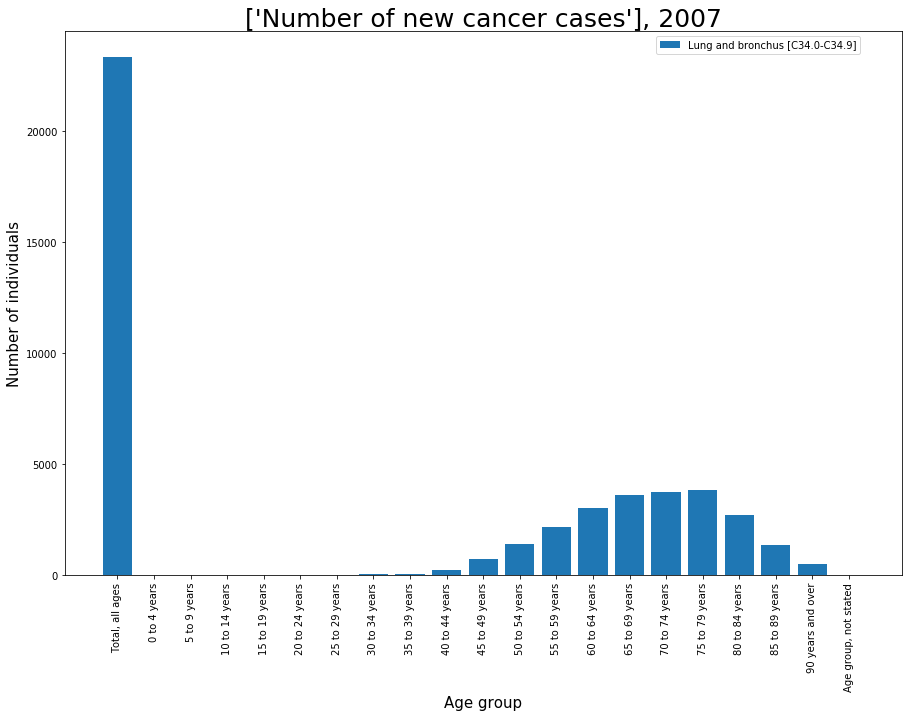

In [42]:
# Plot our table
# Specify figure size
figure(figsize=(15,10))
# Plot a bar chart of data subset
plt.bar(df_subdata_time_sex_age_geo_canc_char["Age group"],df_subdata_time_sex_age_geo_canc_char["VALUE"],label=cancer);
# Add a title
plt.title(str(df_subdata_time_sex_age_geo_canc_char["Characteristics"].unique()) + ", " + str(year),fontsize=25)
# Add a legend
plt.legend(loc='upper left',bbox_to_anchor=(0.7,1))
# Add x and y labels
plt.ylabel("Number of individuals",fontsize=15)
plt.xlabel("Age group",fontsize=15);
# Formatting the plot: rotate x axis labels
plt.xticks(rotation=90);
# Same image to png
plt.savefig(str(df_subdata_time_sex_age_geo_canc_char["Characteristics"].unique()) + "_" + str(df_subdata_time_sex_age_geo_canc_char["Primary types of cancer (ICD-O-3)"].unique()) + '.png')